In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import seaborn as sns
    # #import pandas as pd
    # #import numpy as np
    # #import matplotlib.pyplot as plt
    # #import tensorflow as tf
    # #from sklearn.model_selection import train_test-split
    # import seaborn as sns
    # from keras.callbacks import EarlyStopping

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'Price' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [ ]:
house_df.shape

(506, 14)

In [ ]:
house_df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

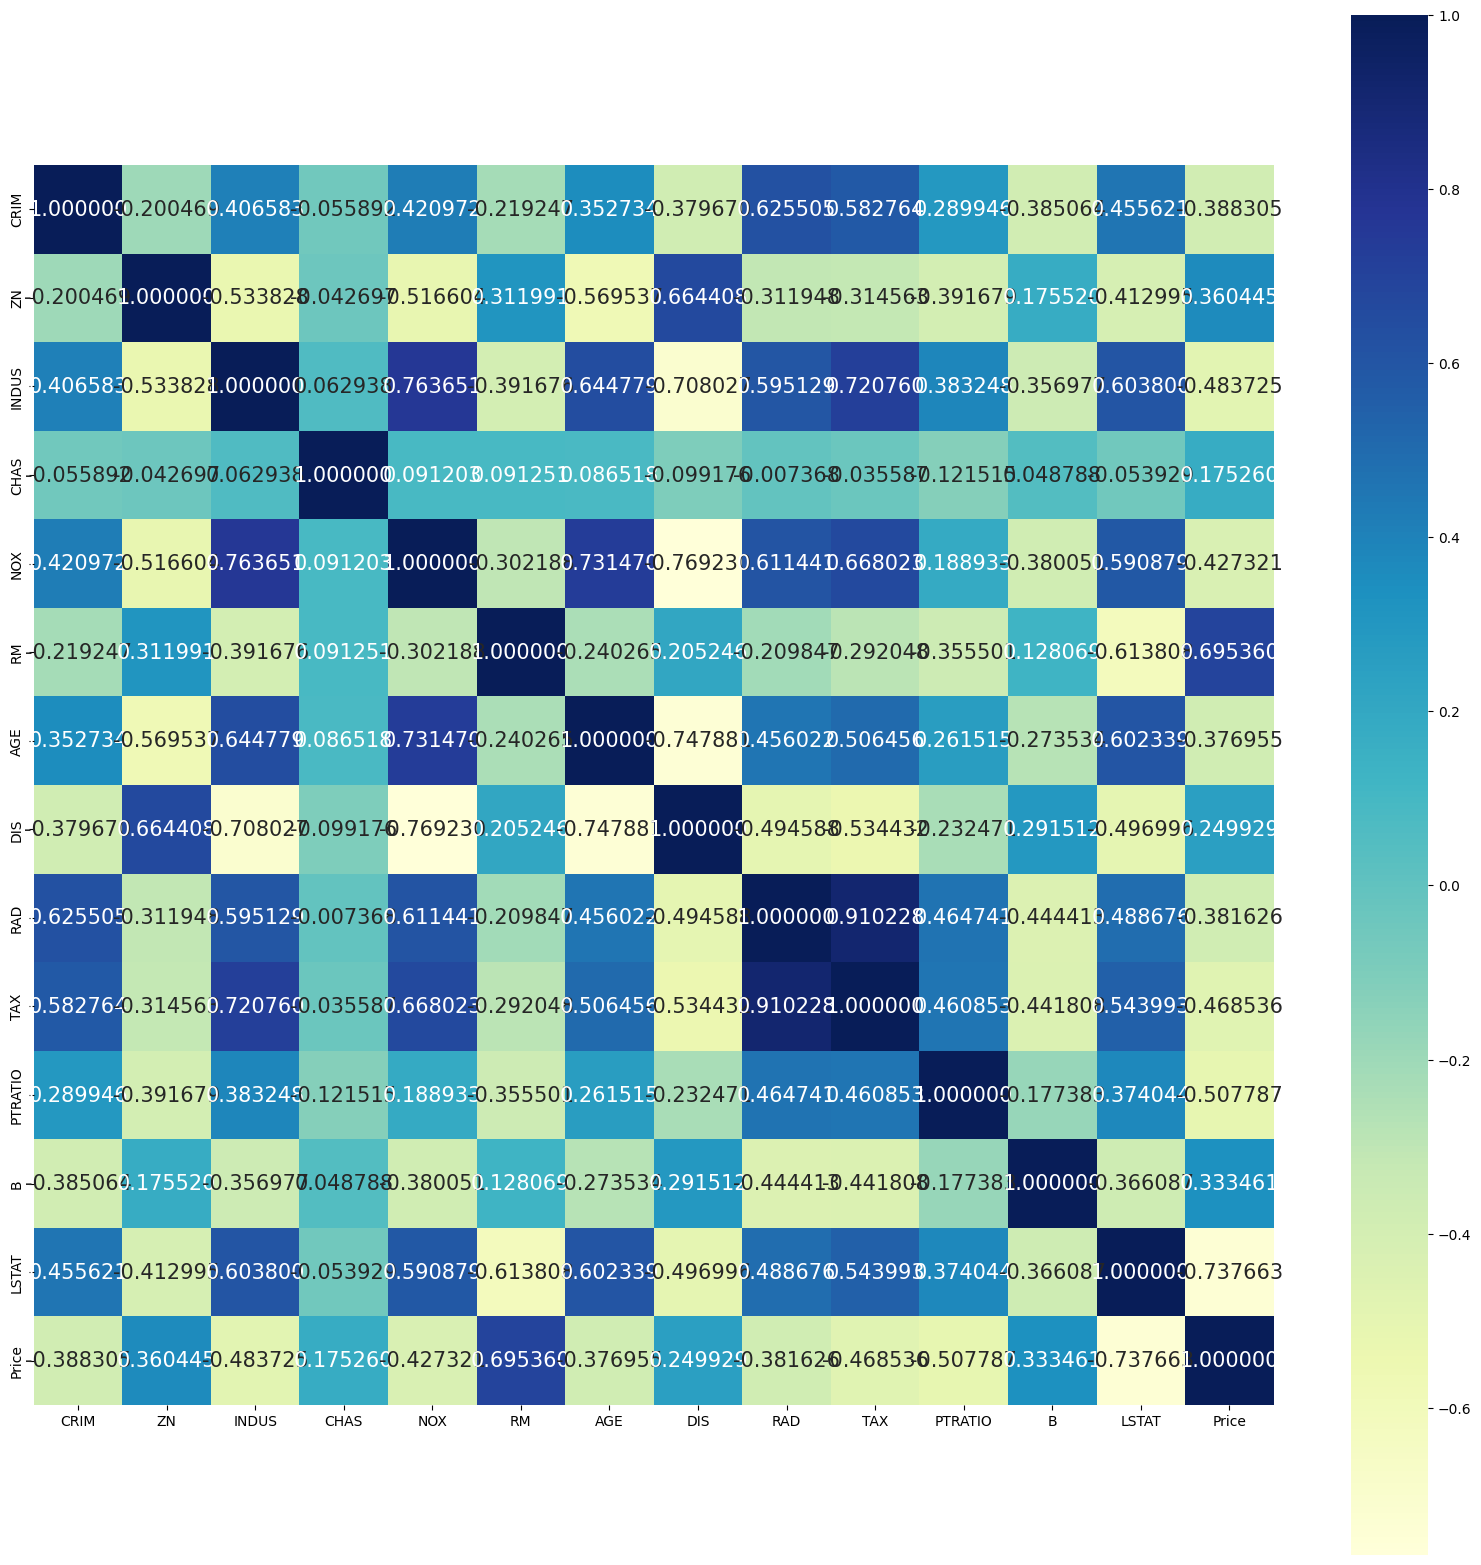

In [ ]:
corr = house_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, cbar = True , square = True , fmt = '1f' , annot = True , annot_kws = {'size':15},cmap='YlGnBu')

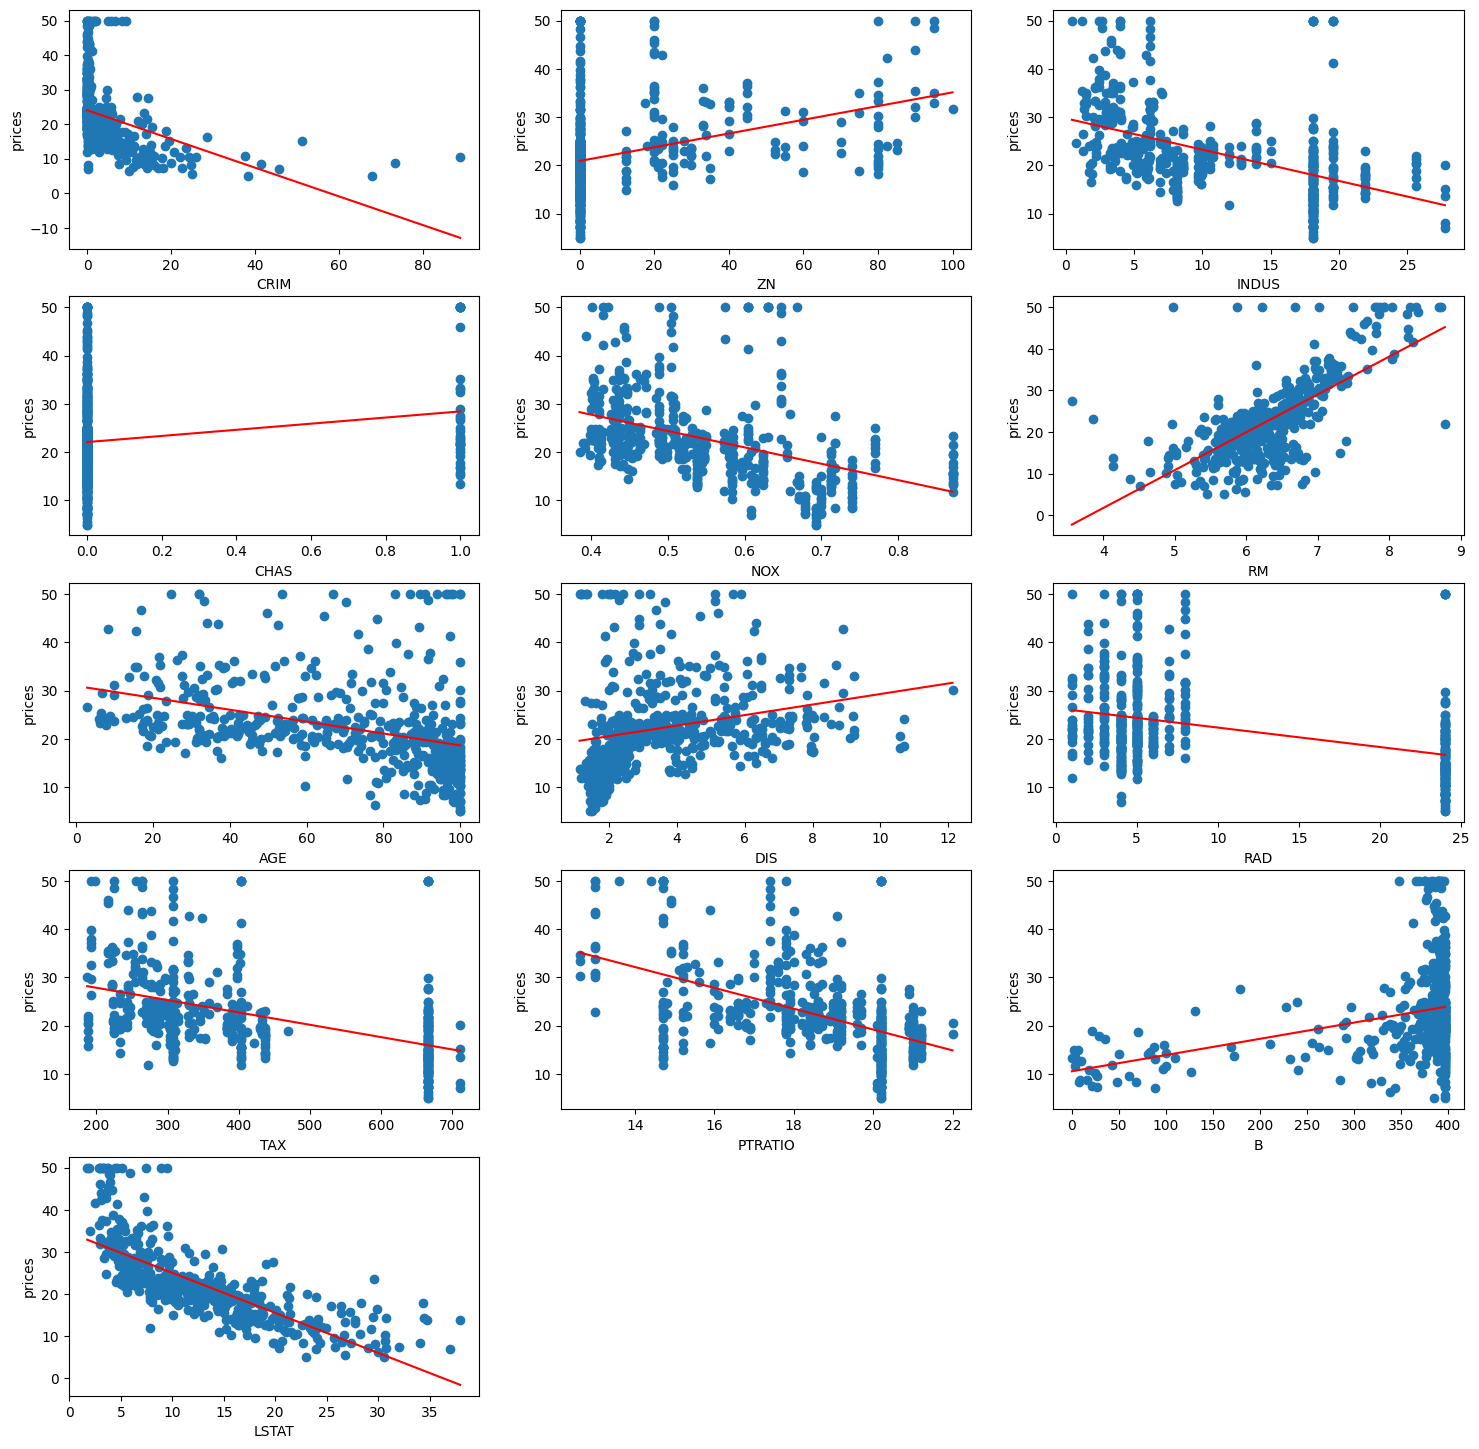

In [ ]:
from scipy import stats

plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): 
    plt.subplot(5, 3, i+1) 
    x = house_df[col] 
    y = house_df['Price'] 
    plt.plot(x, y, 'o')
    
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) 
    plt.ylabel('prices') 
    

In [ ]:
feature = house_df.iloc[:,0:13] 
target = house_df.iloc[:,13]
print(feature.head())
print('\n',target.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64


In [ ]:
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values,test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)



training data shape:  (404, 13)
testing data shape:  (102, 13)


In [ ]:
n_cols = X_train.shape[1]


model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu,input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))


model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=15) 
history = model.fit(X_train, y_train, epochs=300,validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
11/11 [==============================] - 6s 24ms/step - loss: 597.4802 - mae: 22.4932 - val_loss: 482.7177 - val_mae: 20.3209
Epoch 2/300
11/11 [==============================] - 0s 9ms/step - loss: 407.8661 - mae: 17.5894 - val_loss: 107.0452 - val_mae: 7.4718
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 139.7834 - mae: 9.9321 - val_loss: 68.0176 - val_mae: 6.2394
Epoch 4/300
11/11 [==============================] - 0s 7ms/step - loss: 100.2536 - mae: 6.9978 - val_loss: 70.8029 - val_mae: 5.4315
Epoch 5/300
11/11 [==============================] - 0s 8ms/step - loss: 81.8324 - mae: 6.5503 - val_loss: 64.8839 - val_mae: 6.3661
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 74.0962 - mae: 6.4552 - val_loss: 57.7467 - val_mae: 5.0930
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 70.9179 - mae: 5.9536 - val_loss: 58.4313 - val_mae: 5.6184
Epoch 8/300
11/11 [==============================] - 0s 7ms

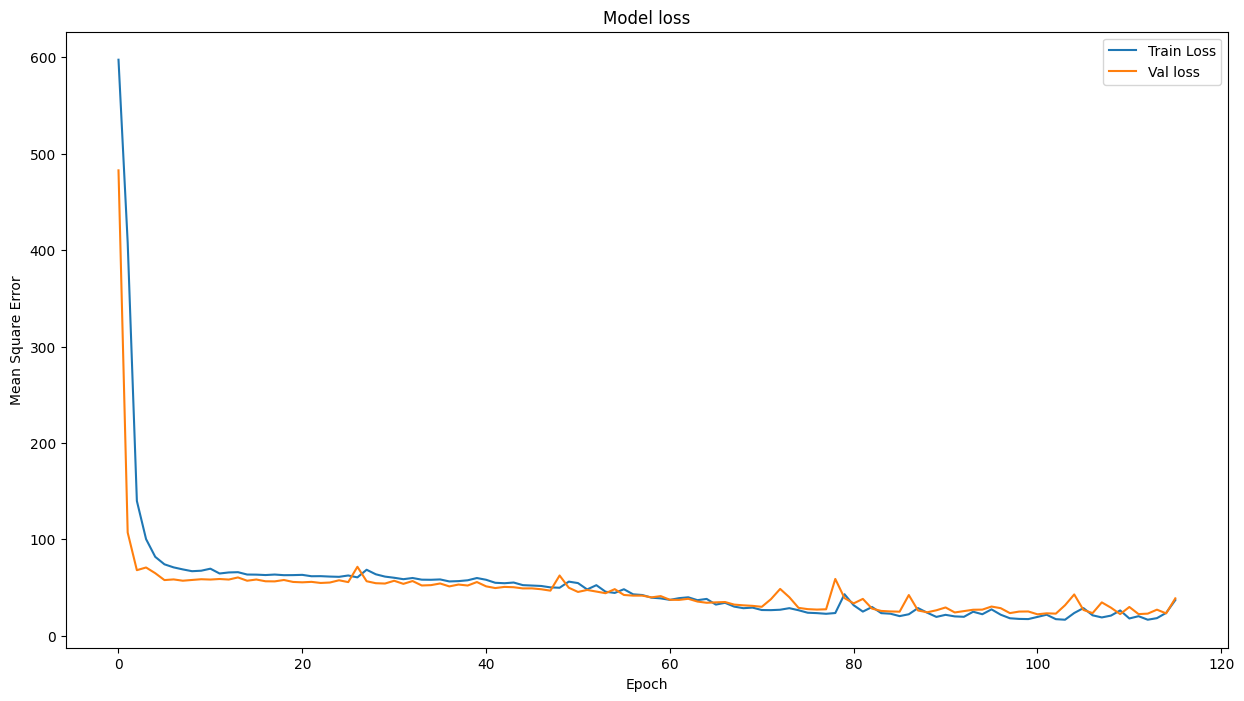

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 32.4653 - mae: 4.8077
loss value:  32.46533203125
Mean absolute error:  4.807704448699951


In [ ]:
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 2ms/step
[30.863789 40.95627  19.671923 30.144331 20.232845 23.579885 21.701286
 17.643717 24.027143 23.66481  24.3047   22.240046  7.714728 23.381351
 25.386654 24.870428 25.03235  14.41042  44.661    19.073746 32.19339
 31.390745 18.033842 27.30092  20.29131  18.631277 26.289902 13.892915
 23.87007  23.374617 25.464499 29.729534 20.530893 26.730896 17.715338
 18.556278 37.742405 28.020044 23.529276 27.62146  19.253946 36.6822
 48.3488   23.19698  29.525839 20.093657 20.466326 28.686853 21.074625
 36.727325 24.897074 40.551464 21.60053  29.251276 46.6843   25.746471
 20.913227 39.650852 28.023392 20.14271  26.544447 37.983913 38.03525
 19.779112 28.92569  20.766277 19.904425 29.729465 36.98887  13.980187
 24.492235 29.061735 15.4466   27.93786  25.271608 12.450169 24.965435
 46.041847 17.174807 16.976822 26.692587 15.643774 26.827003 16.1196
 26.73875  30.720242 20.0988   30.741346 30.727615 22.795712 27.925907
 11.394328 23.831419 21.754976 2

In [ ]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),columns=['True Value','Predicted Value'])
true_predicted.head(10)


,True Value,Predicted Value
0,23.6,30.863789
1,32.4,40.956268
2,13.6,19.671923
3,22.8,30.144331
4,16.1,20.232845
5,20.0,23.579885
6,17.8,21.701286
7,14.0,17.643717
8,19.6,24.027143
9,16.8,23.664810


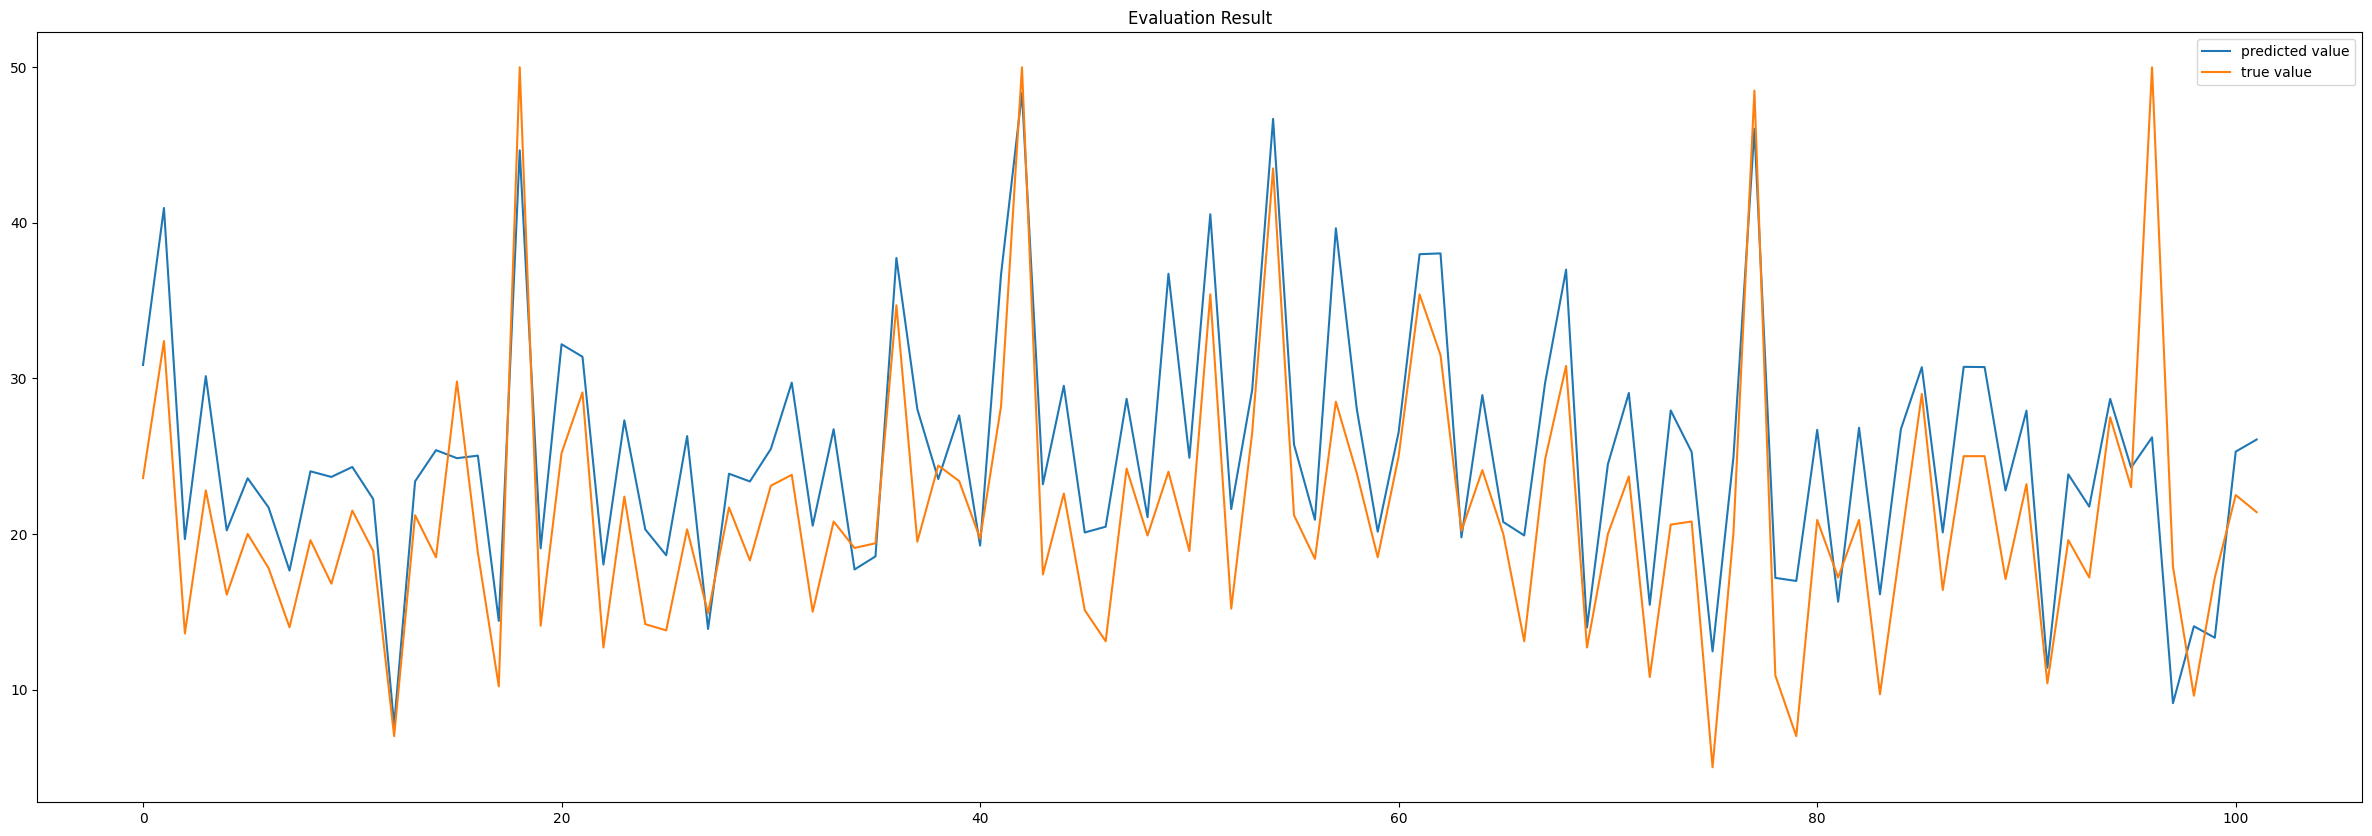

In [ ]:
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

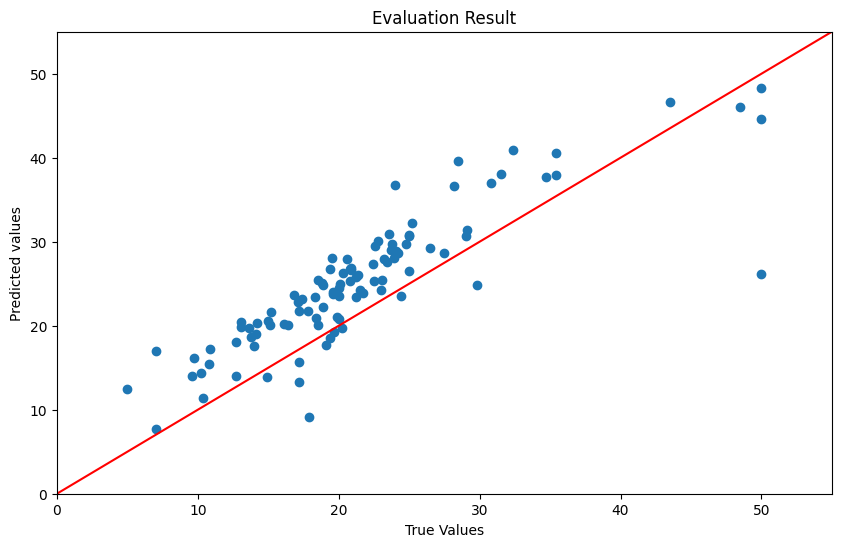

In [ ]:
y = test_predictions 
x = y_test
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(x,y) 
ax.set(xlim=(0,55), ylim=(0, 55)) 
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') 
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()
